## The general idea for my statistic is that the best neighborhood will have the least amount of traffic.

In [178]:
# load pandas
import pandas as pd
from matplotlib import pyplot as plt

#open csv file
traffic_count_csv = pd.read_csv("traffic_count.csv", sep=",")
traffic_count_csv
#grab only specific columns I need
traffic_count = traffic_count_csv[['device_id','average_daily_car_traffic','neighborhood','count_end_date']]
#traffic_count



## Performing data cleaning on my dataset. Removing all NULL characters.

In [179]:
#performing cleaning operations on dataset
traffic_count.dropna(inplace=True)

#traffic_count.dropna(axis='index', how='any', subset=['average_daily_car_traffic'])
#traffic_count.dropna()

traffic_count.sort_values(by='count_end_date', ascending=True)


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,device_id,average_daily_car_traffic,neighborhood,count_end_date
52,37,976.0,Greenfield,2018-06-21
109,39,5327.0,Highland Park,2018-07-11
17,36,7688.0,Highland Park,2018-07-12
3,9,2741.0,Squirrel Hill South,2018-08-01
10,8,5592.0,Squirrel Hill South,2018-08-01
...,...,...,...,...
224,242,3819.0,Homewood South,2020-02-22
226,244,2651.0,Point Breeze North,2020-02-22
222,240,5357.0,Homewood North,2020-02-22
223,241,6446.0,Homewood South,2020-02-22


In [180]:
#read columns into dictionary
traffic_count_dict = {}
#length = traffic_count.count()[0]
length = len(traffic_count.index)
#print(length)
counter = 0
while not counter >= length:
    row = traffic_count.iloc[counter]
    
    """
    To clarify on a few points here, I am doing this in a very backwards way, or at least it feels like I am.
    Anyway, the "row" variable is being used as a sort of "pointer" to grab data from each column using a 0, 1, 2, etc.
    In this specific instance, I only have two columns. 0 being average_daily_car_traffic, and 1 being neighborhood. This is how
    I am grabbing the data from each column for every row.
    This will only save the most RECENT data, since I am sorting the dataset before I am performing this by "count_end_date" ascending.
    """
    traffic_count_dict[row[0]] = row[1], row[2]
    
    #increasing counter by one
    counter+=1
        

## Show all information that has been sorted into dictionary.

In [166]:
for key,value in traffic_count_dict.items():
    print(str(key) + ": " + str(value))

85: (4949.0, 'Polish Hill')
9: (2741.0, 'Squirrel Hill South')
76: (1046.0, 'Central Northside')
87: (3015.0, 'Polish Hill')
8: (5592.0, 'Squirrel Hill South')
65: (1455.0, 'Bluff')
176: (11500.0, 'Crafton Heights')
72: (6793.0, 'Shadyside')
36: (7688.0, 'Highland Park')
118: (10350.0, 'North Shore')
50: (9435.0, 'East Liberty')
23: (3860.0, 'Mount Washington')
173: (9709.0, 'Brookline')
202: (613.0, 'Shadyside')
179: (1163.0, 'East Liberty')
169: (7686.0, 'Mount Washington')
133: (3239.0, 'Squirrel Hill North')
73: (1120.0, 'Bloomfield')
26: (9546.0, 'Squirrel Hill South')
114: (6984.0, 'Bloomfield')
61: (8512.0, 'Larimer')
106: (4448.0, 'Friendship')
116: (3150.0, 'Squirrel Hill North')
92: (12335.0, 'Point Breeze')
192: (16729.0, 'Regent Square')
115: (8911.0, 'East Liberty')
3: (8407.0, 'East Liberty')
132: (1265.0, 'Point Breeze')
55: (1786.0, 'Central Lawrenceville')
196: (527.0, 'Knoxville')
24: (3776.0, 'Central Oakland')
31: (6443.0, 'Strip District')
111: (6984.0, 'Bloomfield

## Top 5-10 light traffic areas

In [181]:
traffic_count_series = pd.Series(traffic_count_dict)

traffic_count_series.sort_values(ascending=True)[:10]


traffic_count.sort_values(['average_daily_car_traffic', 'count_end_date'], ascending=[True, False], inplace=True)

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Graph of data in bar graph style.

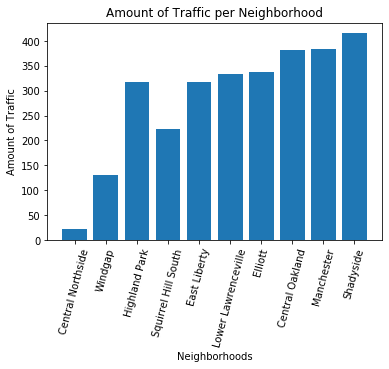

In [182]:
plt.bar(traffic_count['neighborhood'][:11], traffic_count['average_daily_car_traffic'][:11])
plt.xlabel('Neighborhoods')
plt.ylabel('Amount of Traffic')
plt.title('Amount of Traffic per Neighborhood')
plt.xticks(rotation=75)

plt.show()

In [188]:
# getting weights for metrics
traffic_count_weight_dict = {}
counter = 10
key_counter = 2
for neighborhood in traffic_count.sort_values(['average_daily_car_traffic'], ascending=True)['neighborhood'][:10]:
    print(str(neighborhood) + ": " + str(counter))
    #if statement to check if neighborhood is already in list. if so, then populate with neighborhood name + key_counter
    if neighborhood in traffic_count_weight_dict:
        traffic_count_weight_dict[(neighborhood + str(key_counter))] = counter
        key_counter += 1
    else:
        traffic_count_weight_dict[neighborhood] = counter
    counter -= 1
    
print(traffic_count_weight_dict)

Central Northside: 10
Windgap: 9
Highland Park: 8
Squirrel Hill South: 7
Highland Park: 6
East Liberty: 5
Lower Lawrenceville: 4
Elliott: 3
Central Oakland: 2
Manchester: 1
{'Central Northside': 10, 'Windgap': 9, 'Highland Park': 8, 'Squirrel Hill South': 7, 'Highland Park2': 6, 'East Liberty': 5, 'Lower Lawrenceville': 4, 'Elliott': 3, 'Central Oakland': 2, 'Manchester': 1}


# ADD OTHER PROJECTS HERE

# Miles Of Major Roads Metric

In [139]:
import pandas as pd
import numpy as np

import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [140]:
pgh_roads = pd.read_csv("https://data.wprdc.org/dataset/40188e1c-6d2e-4f20-9391-607bd3054949/resource/5d61b60b-bd25-4c33-8420-e31a9135ec6e/download/transportation.csv",
                             parse_dates=True)

In [141]:
major_roads = pgh_roads[['Neighborhood', 'Miles of Major Roads']]



#major_roads = pgh_roads.groupby(['Neighborhood', 'Miles of Major Roads']).count()

In [142]:
#major_roads.sort_values(["Miles of Major Roads"], ascending=False)[:10]


major_roads.sort_values(['Miles of Major Roads'], ascending=False, inplace=True)

major_roads[:10]

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Neighborhood,Miles of Major Roads
16,Central Business District,13.55
13,Brookline,9.15
10,Bluff,9.08
75,Squirrel Hill North,8.19
69,South Oakland,8.07
76,Squirrel Hill South,7.99
25,East Allegheny,7.59
49,Marshall-Shadeland,7.06
56,North Shore,6.81
15,Carrick,6.56


In [143]:
print("The neighborhood that includes the most major roads is the Central Business District.")

The neighborhood that includes the most major roads is the Central Business District.


In [144]:
# getting weights for metrics
major_roads_weight_dict = {}
counter = 10

for neighborhood in major_roads['Neighborhood'][:10]:
    print(str(neighborhood) + ": " + str(counter))
    major_roads_weight_dict[neighborhood] = counter
    counter -= 1

Central Business District: 10
Brookline: 9
Bluff: 8
Squirrel Hill North: 7
South Oakland: 6
Squirrel Hill South: 5
East Allegheny: 4
Marshall-Shadeland: 3
North Shore: 2
Carrick: 1


# Bridges Per Neighborhood Metric

First, lets import the pandas and the pyplot for matplotlib. Then, the data set. It is a csv so we can just use pd.read_csv to read it in.Then, we will then make a dictionary for the data set. This will help us later as we go to read in the data. 

In [145]:
import pandas as pd
from matplotlib import pyplot as plt

dataBridges = pd.read_csv('https://data.wprdc.org/datastore/dump/23f675e5-f745-49c1-8fa0-c5bc35c25184')

# make dictionary
dataBridges_dict = dict()

Next lets go through the dataframe for bridges and make a new item whenever it is a new neighborhood, and if the neighborhood is already in the dictionary (AKA a repeat neighborhood), we will just add one to the total of the item. This takes something that looks like this:

* East Hills 1
* Central Oakland 1
* Homewood South 1
* Central Oakland 1
* Troy Hill 1
* Central Oakland 1

and turns it into

* East Hills 1
* Homewood South 1
* Troy Hill 1
* Central Oakland 3

The data is now easier to understand and chart.

In [146]:
# iterate through the dataframe
for i in range(len(dataBridges)):
    # get the item name and quantity
    item = dataBridges.loc[i, 'start_neighborhood']
    
    if item in dataBridges_dict: # if it's in the dict
        dataBridges_dict[item] += 1 # add the quantity to it
    else:
        dataBridges_dict[item] = 1 # otherwise, set it to the quantity

Then we will convert the dictionary back into a series.

In [147]:
dataBridges_series = pd.Series(dataBridges_dict, name = "Bridges")

In [148]:
dataBridges_series.sort_values()[:]

Lower Lawrenceville           1
Manchester                    1
Northview Heights             1
Summer Hill                   1
Allentown                     1
Banksville                    1
Beechview                     1
Point Breeze North            1
Swisshelm Park                1
East Liberty                  1
Central Northside             1
Allegheny West                1
Fineview                      1
Regent Square                 1
Squirrel Hill North           1
North Oakland                 1
Spring Hill-City View         1
Esplen                        1
Strip District                1
Perry South                   1
Bluff                         2
Lincoln-Lemington-Belmar      2
Windgap                       2
Elliott                       2
Sheraden                      2
Brighton Heights              2
Highland Park                 2
South Shore                   2
Arlington                     2
Marshall-Shadeland            2
Brookline                     2
Mount Wa

In [149]:
dataBridges_series.sort_values(ascending=False)[:10]

Squirrel Hill South          16
South Side Flats              8
Troy Hill                     8
Central Business District     7
Shadyside                     7
Hays                          5
Hazelwood                     5
Oakwood                       5
Overbrook                     4
West End                      4
Name: Bridges, dtype: int64

Text(0, 0.5, 'Total amount of bridges')

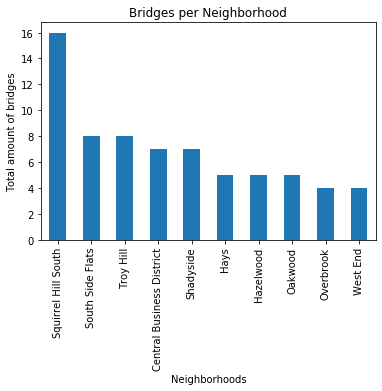

In [151]:
dataBridges_series.sort_values(ascending=False)[:10].plot.bar()
plt.title('Bridges per Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Total amount of bridges')

In [152]:
# getting weights for metrics
dataBridges_series_weight_dict = {}
counter = 10

for neighborhood in dataBridges_series.sort_values(ascending=False).index[:10]:
    print(str(neighborhood) + ": " + str(counter))
    dataBridges_series_weight_dict[neighborhood] = counter
    counter -= 1


Squirrel Hill South: 10
South Side Flats: 9
Troy Hill: 8
Central Business District: 7
Shadyside: 6
Hays: 5
Hazelwood: 4
Oakwood: 3
Overbrook: 2
West End: 1


# Weigh items from 10-1, 10 being the best, 1 being the worst.

# Write about personal favorite neighborhood and describe how it compares to the final metric.

make 3 dictionaries, all holding the top 10 from each list

for loop for range 10:
    if neighborhood name = neighborhood name:
        print to end list
    else:
        move to "bad list"

In [190]:
#performing arithmetic to show final graph

traffic = sorted(traffic_count_weight_dict.items(), key=lambda item: item[1])
print(traffic)

roads = sorted(major_roads_weight_dict.items(), key=lambda item: item[1])

bridges = sorted(dataBridges_series_weight_dict.items(), key=lambda item: item[1])

for (neighborhood, value), (neighborhood2, value2), (neighborhood3, value3) in zip(traffic, roads, bridges):
    print("Traffic: " + str(value) + " " + neighborhood + " \nRoads: " + str(value2) + " " + neighborhood2 + " \nBridges: " + str(value3) + " " + neighborhood3 + "\n\n")
    if str(neighborhood) in str(neighborhood2) in str(neighborhood3):
        print("match")
    #else:
       # print("not a match")

        
        
if firstname = secondname or firstname = thirdname:
    

elif secondname = thirdname:
    
else:
    #put all neighborhood variables 

[('Manchester', 1), ('Central Oakland', 2), ('Elliott', 3), ('Lower Lawrenceville', 4), ('East Liberty', 5), ('Highland Park2', 6), ('Squirrel Hill South', 7), ('Highland Park', 8), ('Windgap', 9), ('Central Northside', 10)]
Traffic: 1 Manchester 
Roads: 1 Carrick 
Bridges: 1 West End


Traffic: 2 Central Oakland 
Roads: 2 North Shore 
Bridges: 2 Overbrook


Traffic: 3 Elliott 
Roads: 3 Marshall-Shadeland 
Bridges: 3 Oakwood


Traffic: 4 Lower Lawrenceville 
Roads: 4 East Allegheny 
Bridges: 4 Hazelwood


Traffic: 5 East Liberty 
Roads: 5 Squirrel Hill South 
Bridges: 5 Hays


Traffic: 6 Highland Park2 
Roads: 6 South Oakland 
Bridges: 6 Shadyside


Traffic: 7 Squirrel Hill South 
Roads: 7 Squirrel Hill North 
Bridges: 7 Central Business District


Traffic: 8 Highland Park 
Roads: 8 Bluff 
Bridges: 8 Troy Hill


Traffic: 9 Windgap 
Roads: 9 Brookline 
Bridges: 9 South Side Flats


Traffic: 10 Central Northside 
Roads: 10 Central Business District 
Bridges: 10 Squirrel Hill South


